In [1]:
import numpy as np
import matplotlib.pyplot as plt

function
$$ 
\frac{dy}{dx} = y^2 +1
$$

In [97]:
def func(x,y):
    dydx = y**2 + 1 
    return dydx

def func_exact(x):
    y = np.tan(x)
    return y

x0: 0.00, y0: 0.00, error0: 0.00
x1: 0.10, y1: 0.100, y_exact1: 0.100335, error1: 0.000
x2: 0.20, y2: 0.201, y_exact2: 0.202710, error2: 0.002
x3: 0.30, y3: 0.305, y_exact3: 0.309336, error3: 0.004
x4: 0.40, y4: 0.414, y_exact4: 0.422793, error4: 0.008
x5: 0.50, y5: 0.532, y_exact5: 0.546302, error5: 0.015
x6: 0.60, y6: 0.660, y_exact6: 0.684137, error6: 0.024
x7: 0.70, y7: 0.803, y_exact7: 0.842288, error7: 0.039
x8: 0.80, y8: 0.968, y_exact8: 1.029639, error8: 0.062
x9: 0.90, y9: 1.161, y_exact9: 1.260158, error9: 0.099
x10: 1.00, y10: 1.396, y_exact10: 1.557408, error10: 0.161
x11: 1.10, y11: 1.691, y_exact11: 1.964760, error11: 0.273
x12: 1.20, y12: 2.077, y_exact12: 2.572152, error12: 0.495
x13: 1.30, y13: 2.609, y_exact13: 3.602102, error13: 0.993
x14: 1.40, y14: 3.390, y_exact14: 5.797884, error14: 2.408
x15: 1.50, y15: 4.639, y_exact15: 14.101420, error15: 9.463


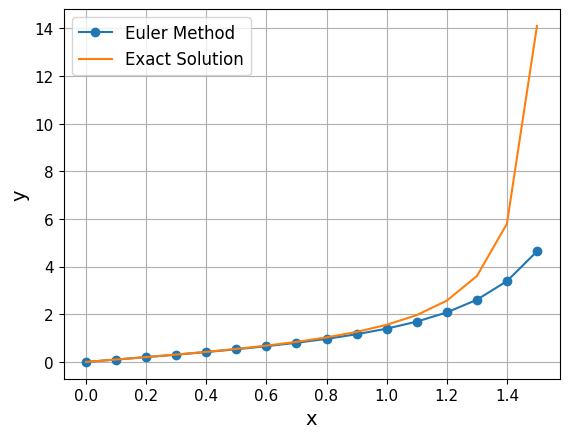

In [121]:
# Euler method
# initial guess
x0 = 0 
y0 = 0
err0 = np.tan(x0) - y0
xn = 1.5
h = 0.10

def euler(f, x0, y0, h, xn):
    n = int((xn-x0)/h)
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    error = np.zeros(n + 1)
    x[0] = x0
    y[0] = y0
    error[0] = np.tan(x0) - y0 
    i = 0

    print(f"x0: {x0:.2f}, y0: {y0:.2f}, error0: {err0:.2f}"  )
    for i in range(n):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * f(x[i], y[i])
        
        y_exact = func_exact(x[i+1])
        error[i+1] = np.abs(y_exact - y[i+1])

        #print(f"y_exact{i+1}: {y_exact[i+1]:.3f})
        print(f"x{i+1}: {x[i+1]:.2f}, y{i+1}: {y[i+1]:.3f}, y_exact{i+1}: {y_exact:.6f}, error{i+1}: {error[i+1]:.3f}")
        
        i += 1

    return x, y, error

x1_euler, y1_euler, error_euler = euler(func, x0, y0, h, xn)

# Plot
plt.plot(x1_euler, y1_euler, 'o-', color='tab:blue', label="Euler Method")
plt.plot(x1_euler, func_exact(x1_euler), color='tab:orange', label="Exact Solution")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.grid()

x0: 0.00, y0: 0.00, error0: 0.00
x1: 0.10, y1: 0.100, error1: 0.000
x2: 0.20, y2: 0.203, error2: 0.000
x3: 0.30, y3: 0.309, error3: 0.000
x4: 0.40, y4: 0.423, error4: 0.000
x5: 0.50, y5: 0.546, error5: 0.000
x6: 0.60, y6: 0.684, error6: 0.000
x7: 0.70, y7: 0.842, error7: 0.000
x8: 0.80, y8: 1.030, error8: 0.000
x9: 0.90, y9: 1.260, error9: 0.000
x10: 1.00, y10: 1.557, error10: 0.000
x11: 1.10, y11: 1.965, error11: 0.000
x12: 1.20, y12: 2.572, error12: 0.000
x13: 1.30, y13: 3.602, error13: 0.001
x14: 1.40, y14: 5.792, error14: 0.006
x15: 1.50, y15: 13.837, error15: 0.265


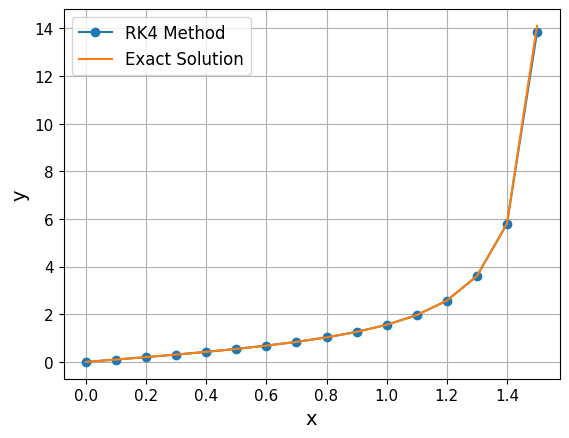

In [118]:
# RK4 method
# initial guess
x0 = 0 
y0 = 0
xn = 1.5
h = 0.10

def RK4(f, x0, y0, h, xn):
    n = int((xn-x0)/h)
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    error = np.zeros(n + 1)
    x[0] = x0
    y[0] = y0
    error[0] = np.tan(x0) - y0 
    i = 0
    

    print(f"x0: {x0:.2f}, y0: {y0:.2f}, error0: {err0:.2f}"  )
    for i in range(n):
        k1 = f(x[i],y[i])
        k2 = f(x[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(x[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(x[i] + h, y[i] + h*k3)
        
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        x[i+1] = x[i] + h

        y_exact = func_exact(x[i+1])
        error[i+1] = np.abs(y_exact - y[i+1])

        print(f"x{i+1}: {x[i+1]:.2f}, y{i+1}: {y[i+1]:.3f}, error{i+1}: {error[i+1]:.3f}")
        i += 1

    return x, y

x1_RK4, y1_RK4 = RK4(func, x0, y0, h, xn)

# Plot
plt.plot(x1_RK4, y1_RK4, 'o-', color='tab:blue', label="RK4 Method")
plt.plot(x1_RK4, func_exact(x1_RK4), color='tab:orange', label="Exact Solution")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.grid()
plt.show()

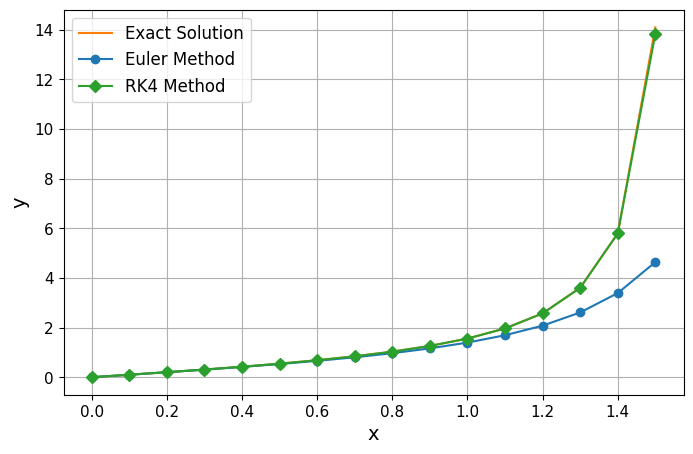

In [100]:
# Comparsion
plt.figure(figsize=(8,5))
plt.plot(x1_RK4, func_exact(x1_RK4), color='tab:orange', label="Exact Solution")
plt.plot(x1_euler, y1_euler, 'o-', color='tab:blue', label="Euler Method")
plt.plot(x1_RK4, y1_RK4, 'D-', color='tab:green', label="RK4 Method")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.grid()
plt.show()